# (4주차) 과제

- toc:true
- branch: master
- badges: true
- comments: true
- editor : 이강철
- published : true
- hide : false

아래식을 최소화하는 $x$를 확률적 경사하강법으로 찾고 애니메이션으로 찾고 시각화할 것

$$y=(x-1)^2$$

## Solution

### import

In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp
plt.rcParams["animation.html"]="jshtml"
from matplotlib import animation 
import numpy as np

In [49]:
tnp.experimental_enable_numpy_behavior()

### 초기값 설정


In [58]:
x = tf.Variable(-3.0)
alpha = 0.01

###  애니메이션 함수 생성

In [59]:
def animate(i): 
    pnts.set_xdata(x_lst[:(i+1)])
    pnts.set_ydata(y_lst[:(i+1)])

### x값에 변화에 따른 변화값을 저장 

$X_{t+1} = [x_{1},\,x_{2}\dots x_{t+1}],\quad Y_{t+1} = [y_{1},\,y_{2}\dots y_{t+1}]$

In [60]:
x_lst=[]
x_lst.append(x.numpy())

y_lst=[]
y_lst.append((x.numpy()-1)**2)


for k in range(100) :
    with tf.GradientTape(persistent=True) as tape :
        tape.watch(x)
        y = (x-1)**2
    x.assign_sub(alpha*tape.gradient(y,x))
    x_lst.append(x.numpy()) 
    y_lst.append((x.numpy()-1)**2) 

### 변화량이 올라타? 기 위한 스케치 생성

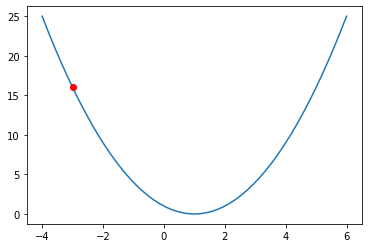

In [61]:
fig = plt.figure()

_x= np.linspace(-4,6)
ax = fig.add_subplot()

ax.plot(_x,(_x-1)**2)
pnts, = ax.plot(x_lst[0],y_lst[0],'or')

### 애니메이션 생성

In [62]:
ani =animation.FuncAnimation(fig, animate, frames=100)
ani